In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import importlib
from tqdm.auto import tqdm
matplotlib.rcParams['figure.figsize']=5,5
from time import sleep
from IPython.display import clear_output

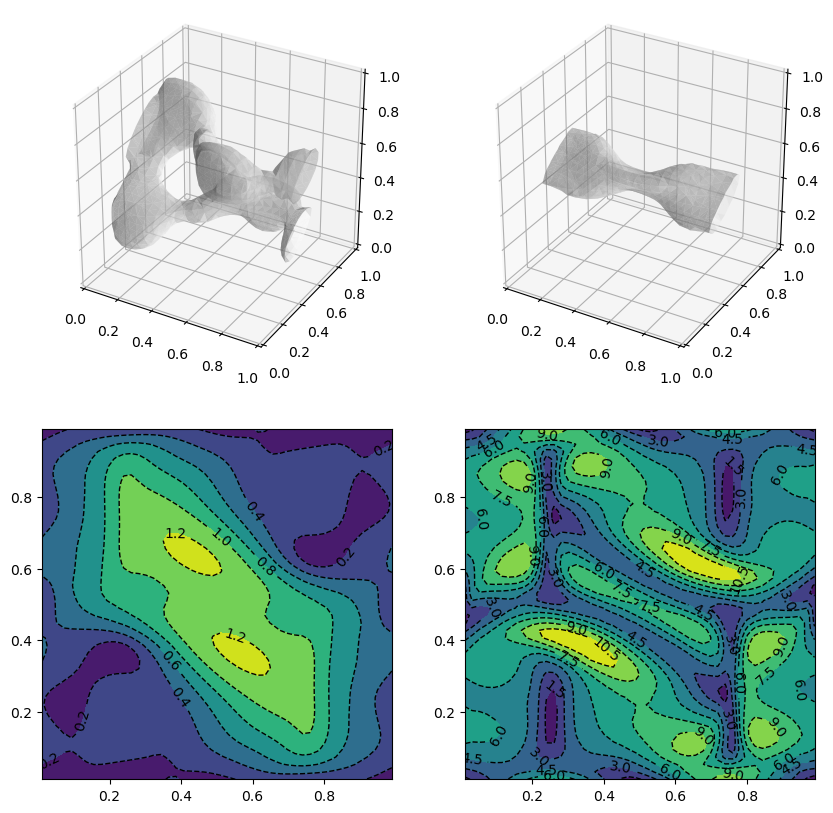

In [8]:
importlib.reload(importlib.import_module('fluid3D'))
from fluid3D import *;import fluid3D


viscosity=0
xyz=get_positions()
u=np.zeros_like(xyz)
u+=taylor_green_vortex()*1
u+=laminar_flow()*1
dy,dz=xyz[...,1]-.5,xyz[...,2]-.5
dye=np.where(dy**2+dz**2<.1**2,1,0)
#u+=diffused_noise(u.shape)*.01
p=None
time=0

def draw():
    plt.gcf().add_subplot(2,2,1,projection='3d')
    vorticity=curl(u)
    show_isosurface(u,rel_level=.9,step_res=24,alpha=.5)
    plt.gcf().add_subplot(2,2,2,projection='3d')
    show_isosurface(dye,abs_level=.3,step_res=24,alpha=.5)
    plt.gcf().add_subplot(2,2,3)
    show_contour_section(xyz,u)
    plt.gcf().add_subplot(2,2,4)
    show_contour_section(xyz,vorticity)

def update_graph():
    clear_output(wait=True)
    plt.figure(figsize=(10,10),dpi=100)
    draw()
    plt.show()
    sleep(0.01)

try:
    for _iter in tqdm(range(6000)):
        if _iter%10==0:
            update_graph()
        
        dye=advect(dye,u)
        u=advect_velocity_MacCormack(u)
        
        u=diffuse(u,amount=viscosity*timeStep,nIter=5)
        

        u,p=solve_pressure(u,density=1,nIter=10,old_pressure=p)
        
        time=time+timeStep
except KeyboardInterrupt:
    pass